# Network Analysis project: Crime dataset

In [74]:
import networkx as nx
import pandas as pd

In [75]:
data_path = '..//Data//out.moreno_crime_crime'
role_path = '..//Data//rel.moreno_crime_crime.person.role'
name_path = '..//Data//ent.moreno_crime_crime.person.name'
gender_path = '..//Data//ent.moreno_crime_crime.person.sex'

In [76]:
# load data
data_df = pd.read_csv(data_path, sep=' ', names=["person", "crime"], index_col=False, dtype={'person':str, 'crime':str})
data_df["person"] = 'p' + data_df['person'] 
data_df['crime'] = 'c' + data_df['crime']
data_df

,person,crime
0,p1,c1
1,p1,c2
2,p1,c3
3,p1,c4
4,p2,c5
...,...,...
1471,p825,c399
1472,p826,c300
1473,p827,c265
1474,p828,c298


In [77]:
# load role attribute
role_df = pd.read_csv(role_path, sep=',', header=None)
# load gender attribute
gender_df =  pd.read_csv(gender_path, sep=' ', header=None)
# load gender attribute
name_df =  pd.read_csv(name_path, sep=' ', header=None)


In [78]:
# get set of people
people = data_df['person'].unique()
# get set of crimes
crimes = data_df['crime'].unique()

In [79]:
# create networkx graph
G=nx.Graph()

# # add nodes
for i in range(len(people)):
    G.add_node(people[i], name=name_df[0][i], gender=gender_df[0][i], bipartite=0)

for i in range(len(crimes)):
    G.add_node(crimes[i], bipartite=1)

# # add edges
for i in range(len(data_df)):
    G.add_edge(data_df['person'][i], data_df['crime'][i], role=role_df[0][i])



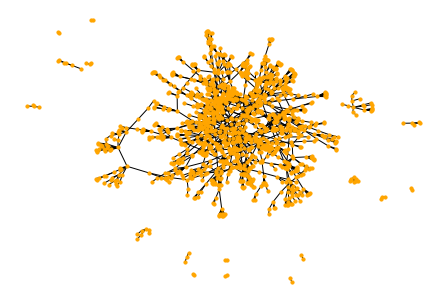

In [80]:
nx.draw(graph, node_size=10, node_color='orange')

In [81]:
# print edge attributes
nx.get_edge_attributes(G,'role')

{('p1', 'c1'): 'Suspect',
 ('p1', 'c2'): 'Victim',
 ('p1', 'c3'): 'Victim',
 ('p1', 'c4'): 'Suspect',
 ('p2', 'c5'): 'Victim',
 ('p2', 'c6'): 'Suspect',
 ('p2', 'c7'): 'Victim',
 ('p2', 'c8'): 'Suspect',
 ('p2', 'c9'): 'Suspect',
 ('p2', 'c10'): 'Suspect',
 ('p2', 'c11'): 'Suspect',
 ('p2', 'c12'): 'Suspect',
 ('p2', 'c13'): 'Suspect',
 ('p2', 'c14'): 'Witness',
 ('p2', 'c15'): 'Suspect',
 ('p2', 'c16'): 'Suspect',
 ('p2', 'c17'): 'Suspect',
 ('p2', 'c18'): 'Suspect',
 ('p2', 'c19'): 'Victim',
 ('p2', 'c20'): 'Suspect',
 ('p2', 'c21'): 'Suspect',
 ('p2', 'c22'): 'Suspect',
 ('p2', 'c23'): 'Victim',
 ('p2', 'c24'): 'Suspect',
 ('p2', 'c25'): 'Suspect',
 ('p2', 'c26'): 'Suspect',
 ('p3', 'c27'): 'Suspect',
 ('p4', 'c24'): 'Suspect',
 ('p5', 'c19'): 'Victim',
 ('p6', 'c28'): 'Victim',
 ('p7', 'c29'): 'Suspect',
 ('p8', 'c30'): 'Suspect',
 ('p9', 'c31'): 'Victim',
 ('p10', 'c32'): 'Victim',
 ('p10', 'c33'): 'Victim',
 ('p10', 'c34'): 'Victim Suspect',
 ('p10', 'c35'): 'Suspect',
 ('p10', '

In [82]:
nx.is_connected(G)

False

In [83]:
# components in the graph sorted in descendent order
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# selecting the biggest component
G0 = G.subgraph(Gcc[0])

In [84]:
comp_list = []
for comp in Gcc:
    comp_len = len(comp)
    comp_list.append(comp_len)

f'Number of nodes for each components {comp_list} and number of components {len(comp_list)}'

'Number of nodes for each components [1263, 30, 18, 13, 9, 7, 6, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2] and number of components 20'

In [85]:
# set of people nodes
top = nx.bipartite.sets(G0)[0]
# normal graph biggest comp
pos = nx.spring_layout(G0)
# bipartite graph BC
posB = nx.bipartite_layout(G0, top)
top

{'p1',
 'p10',
 'p100',
 'p101',
 'p102',
 'p103',
 'p105',
 'p106',
 'p107',
 'p108',
 'p109',
 'p11',
 'p110',
 'p111',
 'p112',
 'p113',
 'p114',
 'p115',
 'p116',
 'p117',
 'p118',
 'p119',
 'p12',
 'p120',
 'p121',
 'p122',
 'p123',
 'p124',
 'p125',
 'p126',
 'p128',
 'p129',
 'p13',
 'p130',
 'p131',
 'p132',
 'p133',
 'p134',
 'p136',
 'p137',
 'p138',
 'p139',
 'p14',
 'p142',
 'p143',
 'p144',
 'p147',
 'p148',
 'p149',
 'p15',
 'p150',
 'p151',
 'p152',
 'p154',
 'p155',
 'p156',
 'p159',
 'p16',
 'p160',
 'p161',
 'p162',
 'p164',
 'p165',
 'p166',
 'p167',
 'p168',
 'p169',
 'p17',
 'p170',
 'p171',
 'p173',
 'p174',
 'p175',
 'p176',
 'p177',
 'p178',
 'p179',
 'p18',
 'p180',
 'p181',
 'p183',
 'p184',
 'p185',
 'p186',
 'p188',
 'p189',
 'p19',
 'p190',
 'p191',
 'p192',
 'p193',
 'p194',
 'p195',
 'p196',
 'p197',
 'p199',
 'p2',
 'p20',
 'p200',
 'p201',
 'p202',
 'p203',
 'p204',
 'p205',
 'p207',
 'p208',
 'p209',
 'p21',
 'p211',
 'p212',
 'p213',
 'p214',
 'p215',

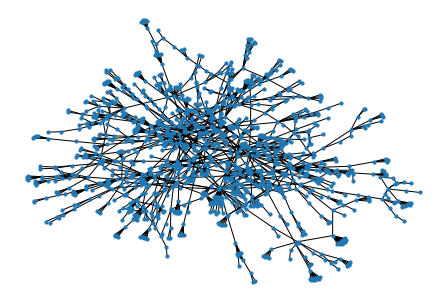

In [86]:
biggest_comp_graph = nx.draw(G0,pos,node_size=10)

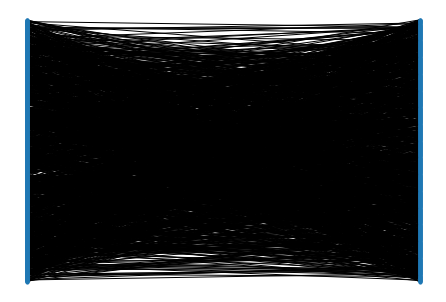

In [87]:
biggest_comp_graph = nx.draw(G0,posB,node_size=10)

In [88]:
# number of nodes in the all graph
num_person = len(set(data_df["person"]))
num_crime = len(set(data_df['crime']))
f'Number of person: {num_person} and number of crimes: {num_crime}'


'Number of person: 829 and number of crimes: 551'

In [89]:
# number of nodes in the biggest componnet
num_G0 = nx.bipartite.sets(G0)
num_p_list = [num_p for num_p in num_G0 if 'p' in num_p] 
num_p_list

[]

In [95]:
# number of people
len(num_G0[0])
# number of crimes
len(num_G0[1])


509

In [102]:
#print(G0.edges(data=True))

In [104]:
suspect_edges = [(u,v) for u,v,e in G0.edges(data=True) if e['role'] == 'Suspect']
print (selected_edges)

[('p1', 'c2'), ('p1', 'c3'), ('p2', 'c5'), ('p2', 'c7'), ('p2', 'c19'), ('p2', 'c23'), ('p5', 'c19'), ('p6', 'c28'), ('p9', 'c31'), ('p10', 'c32'), ('p10', 'c33'), ('p11', 'c31'), ('p12', 'c40'), ('p12', 'c41'), ('p12', 'c42'), ('p13', 'c42'), ('p14', 'c42'), ('p21', 'c52'), ('p21', 'c53'), ('p27', 'c58'), ('p28', 'c59'), ('p30', 'c61'), ('p32', 'c63'), ('p33', 'c8'), ('p33', 'c10'), ('p37', 'c66'), ('p40', 'c74'), ('p41', 'c76'), ('p45', 'c79'), ('p48', 'c84'), ('p49', 'c85'), ('p51', 'c87'), ('p51', 'c88'), ('p52', 'c93'), ('p54', 'c97'), ('p56', 'c98'), ('p56', 'c100'), ('p56', 'c102'), ('p56', 'c103'), ('p56', 'c105'), ('p56', 'c107'), ('p56', 'c108'), ('p57', 'c50'), ('p57', 'c108'), ('p58', 'c50'), ('p58', 'c108'), ('p60', 'c111'), ('p62', 'c64'), ('p67', 'c12'), ('p67', 'c15'), ('p67', 'c16'), ('p71', 'c73'), ('p73', 'c28'), ('p77', 'c127'), ('p79', 'c130'), ('p79', 'c131'), ('p79', 'c132'), ('p79', 'c133'), ('p79', 'c134'), ('p79', 'c135'), ('p83', 'c137'), ('p84', 'c138'), ('p

TypeError: list indices must be integers or slices, not str

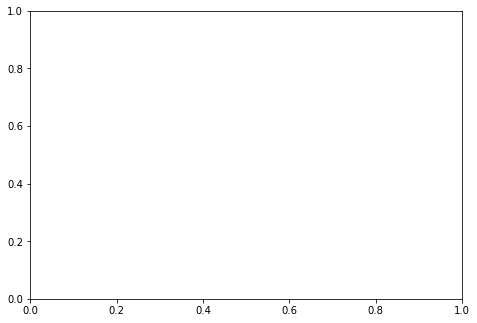

In [103]:
nx.draw(G0,selected_edges,node_size=10)